# Visualization for multiplex network

## mplx20211204_142540.csv

```
trial_count = 100
agent_count = 10^3
generations = 10^3

network_type_game_list = [:regular_2, :regular_4, :regular_6, :regular_8, :scale_free_2, :scale_free_4, :scale_free_6, :scale_free_8]
network_type_learning_list = [:regular_2, :regular_4, :regular_6, :regular_8, :scale_free_2, :scale_free_4, :scale_free_6, :scale_free_8]
n_game_list = [4]
n_learning_list = [4]
b_list = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
```

## mplx20211204_171439.csv

```
trial_count = 100
agent_count = 10^3 * 2
generations = 10^3

network_type_game_list = [:scale_free_2, :scale_free_4, :scale_free_6, :scale_free_8]
network_type_learning_list = [:scale_free_2, :scale_free_4, :scale_free_6, :scale_free_8]
n_game_list = [4]
n_learning_list = [4]
b_list = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
```

## mplx20211204_220715.csv

```
trial_count = 100
agent_count = 10^3
generations = 10^3

network_type_game_list = [:scale_free_4]
network_type_learning_list = [:scale_free_4, :complete]
n_game_list = [4]
n_learning_list = [4]
b_list = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
```

In [13]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
class Simulation:
    def __init__(self, file_name):
        self.file_name = file_name
        _columns = ['network_type_game', 'network_type_learning', 'n_game', 'n_learning', 'b', 'trial', 'step', 'cooperator_rate']
        self.df = pd.read_csv(file_name, header=1, names=_columns)

        self.network_type_game_list = sorted(set(self.df.network_type_game))
        self.network_type_learning_list = sorted(set(self.df.network_type_learning))
        self.n_game_list = sorted(set(self.df.n_game))
        self.n_learning_list = sorted(set(self.df.n_learning))
        self.b_list = sorted(set(self.df.b))

    def cooperator_rate_groupby_network_type_step(self, n_game: int, n_learning: int, b: float) -> pd.DataFrame:
        return self.df[
            (sim_mplx.df.n_game == n_game) & 
            (sim_mplx.df.n_learning == n_learning) & 
            (sim_mplx.df.b == b)
        ].groupby(['network_type_game', 'network_type_learning', 'step']).agg({'cooperator_rate': np.mean}).reset_index()

    def cooperator_rate_last_200_steps(self) -> pd.DataFrame:
        return self.df[self.df.step >= (max(self.df.step) - 200)]\
            .groupby(['network_type_game', 'network_type_learning', 'n_game', 'n_learning', 'b']) \
            .agg({'cooperator_rate': np.mean})\
            .reset_index()

In [15]:
# sim_mplx = Simulation("data/mplx20211204_142540.csv")
sim_mplx = Simulation("data/mplx20211204_171439.csv")
# sim_mplx = Simulation("data/mplx20211204_220715.csv")

In [60]:
_df_last_200 = sim_mplx.cooperator_rate_last_200_steps()

_df_sf = _df_last_200[
    _df_last_200.network_type_game.isin(['scale_free_4', 'scale_free_6', 'scale_free_8', 'complete']) &
    _df_last_200.network_type_learning.isin(['scale_free_4', 'scale_free_6', 'scale_free_8', 'complete'])
]

_df_sf = _df_sf.assign(network_type =\
    _df_sf.network_type_game.str.replace('scale_free_', 'game:') + ' x ' + \
    _df_sf.network_type_learning.str.replace('scale_free_', 'learn:'))

<AxesSubplot:title={'center':'Effect of network type in scale-free network'}, xlabel='b', ylabel='Population frequency of cooperators'>

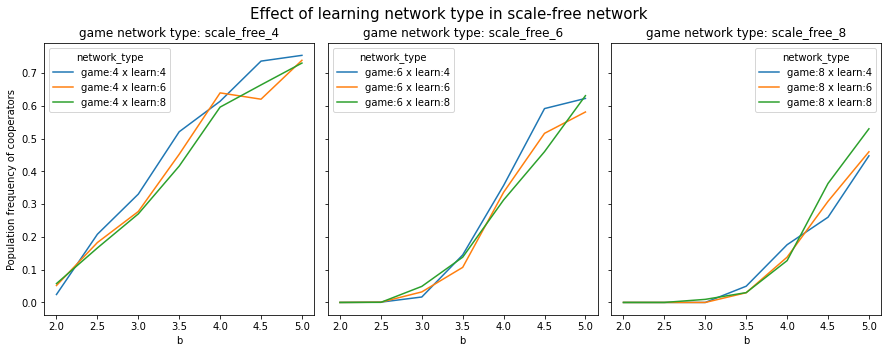

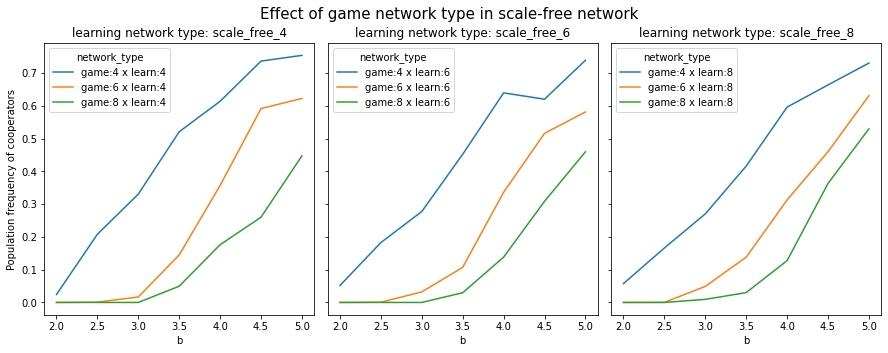

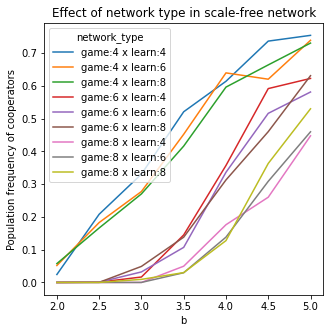

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)
fig.suptitle('Effect of learning network type in scale-free network', fontsize=15)
plt.subplots_adjust(wspace=0.05)

for i, network_type in enumerate(sorted(set(_df_sf['network_type_game']))):
    _df = _df_sf[_df_sf['network_type_game'] == network_type]

    _ax = ax[i]
    _ax.set_title('game network type: {}'.format(network_type))
    if i % 4 == 0:
        _ax.set_ylabel('Population frequency of cooperators')
    sns.lineplot(data=_df, x='b', y='cooperator_rate', hue='network_type', ax=_ax)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)
fig.suptitle('Effect of game network type in scale-free network', fontsize=15)
plt.subplots_adjust(wspace=0.05)

for i, network_type in enumerate(sorted(set(_df_sf['network_type_learning']))):
    _df = _df_sf[_df_sf['network_type_learning'] == network_type]

    _ax = ax[i]
    _ax.set_title('learning network type: {}'.format(network_type))
    if i % 4 == 0:
        _ax.set_ylabel('Population frequency of cooperators')
    sns.lineplot(data=_df, x='b', y='cooperator_rate', hue='network_type', ax=_ax)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.set_title('Effect of network type in scale-free network')
ax.set_ylabel('Population frequency of cooperators')
sns.lineplot(data=_df_sf, x='b', y='cooperator_rate', hue='network_type')

# b = 3, hop = (1, 1) のケースと矛盾してない？ → multiplex だから。scale_free_4 のときは両層で同じネットワークを使わなければならない。両層で適当なネットワークを使うんじゃなくて、ゲーム層のネットワークをベースに、平均距離がnになるまでランダムに枝を追加していって作ったネットワークで学習するなどしたら面白そう。

- game network が regularネットワークの場合
    - 次数が 2 の場合は、どんな環境 (b) でも協力行動が進化する。
    - 次数が 4 になると、厳しい環境 (b = 2 〜 3.5)では協力行動は進化しないが、緩い環境 (b = 4.0〜5.0) になると、協力行動が進化するようになる。ここで、regular_2とscale_free_2は厳しい環境では相対的に進化を促進するが、緩い環境では相対的に進化を促進しない。

In [8]:
_df_sf[
    (_df_sf.network_type_game == 'scale_free_4') &
    (_df_sf.b == 2.0)
][['network_type_learning', 'cooperator_rate']].sort_values('cooperator_rate', ascending=False).reset_index(drop=True)

,network_type_learning,cooperator_rate
0,complete,0.170558
1,scale_free_4,0.017685


In [9]:
_df_sf[
    (_df_sf.network_type_game == 'scale_free_4') &
    (_df_sf.b == 2.5)
][['network_type_learning', 'cooperator_rate']].sort_values('cooperator_rate', ascending=False).reset_index(drop=True)

,network_type_learning,cooperator_rate
0,complete,0.407108
1,scale_free_4,0.200881


In [8]:
# _df = _df_last_200[
#     (_df_last_200.network_type_game == 'scale_free_4') &
#     (_df_last_200.network_type_learning.isin(['scale_free_2', 'scale_free_4', 'scale_free_6', 'scale_free_8'])) &
#     (_df_last_200.b <= 3.0)
# ]
# sns.lineplot(data=_df, x='b', y='cooperator_rate', hue='network_type_learning')

In [9]:
# _df_last_200_learning = _df_last_200[_df_last_200.network_type_game == 'scale_free_4']
# _df_last_200_game = _df_last_200[_df_last_200.network_type_learning == 'scale_free_4']

In [10]:
# fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True, sharey=True)
# fig.suptitle('Effect of game network type', fontsize=15)
# plt.subplots_adjust(wspace=0.1, hspace=0.1)

# for i, network_type in enumerate(sorted(set(_df_last_200['network_type_learning']))):
#     _df = _df_last_200[_df_last_200['network_type_learning'] == network_type]

#     _ax = ax[int(i / 4), i % 4]
#     _ax.set_title('learning network type: {}'.format(network_type))
#     if i % 4 == 0:
#         _ax.set_ylabel('Population frequency of cooperators')
#     sns.lineplot(data=_df, x='b', y='cooperator_rate', hue='network_type_game', ax=_ax)

In [11]:
# fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)
# fig.suptitle('Effect of learning network type in regular network', fontsize=15)
# plt.subplots_adjust(wspace=0.1)

# _df_sf = _df_last_200[
#     _df_last_200.network_type_game.isin(['regular_2', 'regular_4', 'regular_6', 'regular_8']) &
#     _df_last_200.network_type_learning.isin(['regular_2', 'regular_4', 'regular_6', 'regular_8'])
# ]

# for i, network_type in enumerate(sorted(set(_df_sf['network_type_game']))):
#     _df = _df_sf[_df_sf['network_type_game'] == network_type]

#     _ax = ax[i]
#     _ax.set_title('game network type: {}'.format(network_type))
#     if i % 4 == 0:
#         _ax.set_ylabel('Population frequency of cooperators')
#     sns.lineplot(data=_df, x='b', y='cooperator_rate', hue='network_type_learning', ax=_ax)

In [12]:
# fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
# plt.subplots_adjust(hspace=0.4)

# for nrow, ncol in itertools.product(range(2), range(3)):
#     ax[nrow, ncol].set_ylabel('Population frequency of cooperators')
#     ax[nrow, ncol].set_ylim(-0.05, 1.05)

# ax[0, 0].set_title('\n<k> of game network = 4, last 200 steps')
# sns.lineplot(data=_df_last_200_learning, x='b', y='cooperator_rate', hue='network_type_learning', ax=ax[0, 0])

# ax[0, 1].set_title('Effect of learning network type\nb = 2.0')
# sns.lineplot(data=_df_b20_learning, x='step', y='cooperator_rate', hue='network_type_learning', ax=ax[0, 1])

# ax[0, 2].set_title('\nb = 2.5')
# sns.lineplot(data=_df_b25_learning, x='step', y='cooperator_rate', hue='network_type_learning', ax=ax[0, 2])

# ax[1, 0].set_title('\n<k> of learning network = 4, last 200 steps')
# sns.lineplot(data=_df_last_200_game, x='b', y='cooperator_rate', hue='network_type_game', ax=ax[1, 0])

# ax[1, 1].set_title('Effect of game network type\nb = 3.5')
# sns.lineplot(data=_df_b35_game, x='step', y='cooperator_rate', hue='network_type_game', ax=ax[1, 1])

# ax[1, 2].set_title('\nb = 4.0')
# sns.lineplot(data=_df_b40_game, x='step', y='cooperator_rate', hue='network_type_game', ax=ax[1, 2])

In [13]:
# _df_b20 = sim_mplx.cooperator_rate_groupby_network_type_step(n_game=4, n_learning=4, b=2.0)
# _df_b20_learning = _df_b20[_df_b20.network_type_game == 'scale_free_4']
# _df_b25 = sim_mplx.cooperator_rate_groupby_network_type_step(n_game=4, n_learning=4, b=2.5)
# _df_b25_learning = _df_b25[_df_b25.network_type_game == 'scale_free_4']

# _df_b35 = sim_mplx.cooperator_rate_groupby_network_type_step(n_game=4, n_learning=4, b=3.5)
# _df_b35_game = _df_b35[_df_b35.network_type_learning == 'scale_free_4']
# _df_b40 = sim_mplx.cooperator_rate_groupby_network_type_step(n_game=4, n_learning=4, b=4.0)
# _df_b40_game = _df_b40[_df_b40.network_type_learning == 'scale_free_4']

In [14]:
# fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharex=True, sharey=True)
# fig.suptitle('Effect of learning network type', fontsize=15)
# plt.subplots_adjust(wspace=0.1, hspace=0.1)

# for i, network_type in enumerate(sorted(set(_df_last_200['network_type_game']))):
#     _df = _df_last_200[_df_last_200['network_type_game'] == network_type]

#     _ax = ax[int(i / 4), i % 4]
#     _ax.set_title('game network type: {}'.format(network_type))
#     if i % 4 == 0:
#         _ax.set_ylabel('Population frequency of cooperators')
#     sns.lineplot(data=_df, x='b', y='cooperator_rate', hue='network_type_learning', ax=_ax)